In [3]:
import numpy as np
from pprint import pprint

np.random.seed(42)

from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer

In [4]:
X, y = fetch_openml('mnist_784', version= 1, return_X_y= True)

/home/anni/Data/BS/jupyter_notebook/lib/python3.10/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [5]:
X, y = X.to_numpy(), y.to_numpy()

In [8]:
x_train, x_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [9]:
pipe_logit = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(multi_class='multinomial', 
                                  solver= 'sag'))
])
pipe_logit.fit(x_train, y_train)

/home/anni/Data/BS/jupyter_notebook/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg',
                 LogisticRegression(multi_class='multinomial', solver='sag'))])

In [10]:
pipe_logit[-1].coef_.shape

(10, 784)

In [11]:
pipe_logit[-1].intercept_.shape

(10,)

In [12]:
pipe_logit[-1].classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

### Model evaluation

In [13]:
print(classification_report(y_test, pipe_logit.predict(x_test)))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.96      0.98      0.97      1135
           2       0.94      0.90      0.92      1032
           3       0.91      0.91      0.91      1010
           4       0.92      0.94      0.93       982
           5       0.91      0.87      0.89       892
           6       0.93      0.95      0.94       958
           7       0.92      0.93      0.92      1028
           8       0.88      0.88      0.88       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



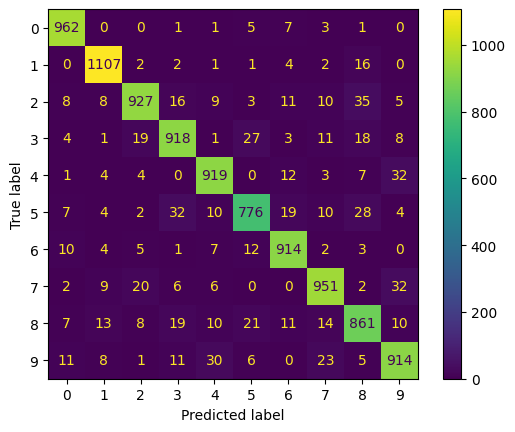

In [14]:
ConfusionMatrixDisplay.from_estimator(pipe_logit, x_test, y_test)